In [3]:
import numpy as np
import pandas as pd

import os, glob, re, scipy.io
import seaborn as sns
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model

from sklearn.preprocessing import label_binarize

from sklearn.model_selection import train_test_split, TimeSeriesSplit
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse

from sklearn.metrics import precision_score, recall_score, precision_recall_curve, f1_score, fbeta_score
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.utils.multiclass import unique_labels

from GetCars import *

%matplotlib inline


Bad key "text.kerning_factor" on line 4 in
C:\Users\Howlw\anaconda3\envs\py3_TF2\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [4]:
x_features = pd.read_csv("../Xception.csv")
y_features = pd.read_csv("../devkit/cars_agg_label.csv")

In [5]:
x_features

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,2039,2040,2041,2042,2043,2044,2045,2046,2047,2048
0,0,1.0,0.000000,0.482095,0.188462,0.000000,0.000000,0.003716,0.054558,0.000000,...,0.090184,0.000000,0.026741,0.000000,0.000000,0.000000,0.034421,0.100708,0.003976,0.000000
1,1,2.0,0.009853,0.185145,0.000000,0.000000,0.040543,0.017445,0.520675,0.007425,...,0.330200,0.005697,0.199426,0.000000,0.000613,0.015227,0.165992,0.005659,0.000000,0.025758
2,2,3.0,0.000000,0.145474,0.061037,0.002622,0.093089,0.195964,0.041898,0.007854,...,0.351028,0.023117,0.059103,0.000000,0.000570,0.050922,0.008047,0.079836,0.052042,0.000000
3,3,4.0,0.000000,0.000000,0.036351,0.000000,0.190445,0.000000,0.281997,0.230349,...,0.440752,0.010171,0.165466,0.000000,0.000055,0.192988,0.212579,0.386524,0.000000,0.002407
4,4,5.0,0.041853,0.115688,0.146873,0.091255,0.003780,0.362956,0.187391,0.015959,...,0.711239,0.028503,0.072823,0.000000,0.000000,0.166260,0.303827,0.036632,0.124993,0.148024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16180,16180,16181.0,0.004347,0.025228,0.000000,0.017241,0.019596,0.097211,0.150389,0.019595,...,0.031970,0.000000,0.246015,0.000000,0.045233,0.136407,0.309453,0.103568,0.000000,0.021073
16181,16181,16182.0,0.000000,0.006300,0.009755,0.192738,0.154386,0.276055,0.152174,0.014900,...,0.145803,0.068830,0.130881,0.000000,0.030011,0.289080,0.141634,0.063253,0.000000,0.091391
16182,16182,16183.0,0.000000,0.001152,0.009132,0.352294,0.227306,0.170495,0.210053,0.097918,...,0.003054,0.024923,0.184650,0.000000,0.099032,0.427607,0.278434,0.143741,0.022912,0.213462
16183,16183,16184.0,0.050815,0.063271,0.071226,0.119769,0.000000,0.141258,0.105661,0.037634,...,0.116099,0.000000,0.351650,0.000307,0.214316,0.092968,0.339648,0.175131,0.289928,0.016890


In [6]:
y_features

,Unnamed: 0,fileNumber,xmin,ymin,xmax,ymax,class_no,class_label,train_test,subclass,Label1,Label1_No,Label2,Label2_No
0,0,1,112,7,853,717,1,AM General Hummer SUV 2000,0,u,SUVs/Trucks/Vans,3,SUV,3
1,1,2,48,24,441,202,1,AM General Hummer SUV 2000,0,u,SUVs/Trucks/Vans,3,SUV,3
2,2,3,7,4,277,180,1,AM General Hummer SUV 2000,0,u,SUVs/Trucks/Vans,3,SUV,3
3,3,4,33,50,197,150,1,AM General Hummer SUV 2000,0,u,SUVs/Trucks/Vans,3,SUV,3
4,4,5,5,8,83,58,1,AM General Hummer SUV 2000,0,u,SUVs/Trucks/Vans,3,SUV,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16180,16180,16181,38,36,375,234,196,smart fortwo Convertible 2012,1,c,Coupe/Convrtbl,1,Coupe/Convrtbl,1
16181,16181,16182,29,34,235,164,196,smart fortwo Convertible 2012,1,c,Coupe/Convrtbl,1,Coupe/Convrtbl,1
16182,16182,16183,25,32,587,359,196,smart fortwo Convertible 2012,1,c,Coupe/Convrtbl,1,Coupe/Convrtbl,1
16183,16183,16184,56,60,208,186,196,smart fortwo Convertible 2012,1,c,Coupe/Convrtbl,1,Coupe/Convrtbl,1


In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    x_features.iloc[:,2:], y_features["Label2_No"], test_size=0.50, random_state=333)

In [8]:
logreg = LogisticRegression(C=100000, verbose=True, solver="saga") # C: Inverse of regularization strength; 
logreg.fit(X_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


max_iter reached after 44 seconds


C:\Users\Howlw\anaconda3\envs\py3_TF2\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   43.3s finished


LogisticRegression(C=100000, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='saga', tol=0.0001, verbose=True,
                   warm_start=False)

In [9]:
from joblib import dump, load
dump("logreg", "Models/Xception/LogReg1.joblib")

['Models/Xception/LogReg1.joblib']

In [10]:
ytest_labels = logreg.predict(X_test)
ytest_prob = logreg.predict_proba(X_test)
train_score = logreg.score(X_train, y_train)
test_score = logreg.score(X_test, y_test)
print("Train Score for the Logit Model: {:.3f}".format(train_score))
print("Test Score for the Logit Model: {:.3f}".format(test_score))

Train Score for the Logit Model: 0.925
Test Score for the Logit Model: 0.776


In [11]:
f1_score(y_test, ytest_labels, average="macro")

0.8139675004321782

In [14]:
labels = ["Coupe/Convertible", "Sedan", "SUVs","Trucks","Vans"]
print("Confusion matrix: \n\n", confusion_matrix(y_test, ytest_labels))

Confusion matrix: 

 [[2228  561   80    6    7]
 [ 557 1714  130    4    8]
 [  77  164 1130   56   31]
 [   6    5   58  699    3]
 [   6   24   25    6  508]]


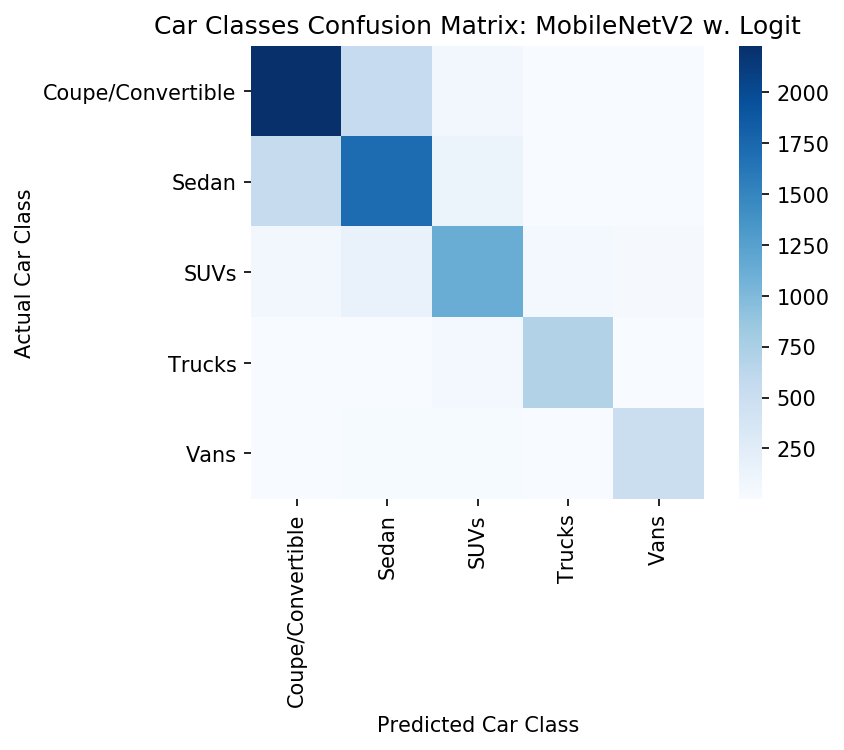

In [15]:
Mobile_confusion = confusion_matrix(y_test, ytest_labels)
plt.figure(dpi=150)
sns.heatmap(Mobile_confusion, cmap=plt.cm.Blues, annot=False, square=True,
           xticklabels=labels,
           yticklabels=labels)

plt.xlabel('Predicted Car Class')
plt.ylabel('Actual Car Class')
plt.title('Car Classes Confusion Matrix: MobileNetV2 w. Logit');

In [16]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=True,
                          title=None,
                          cmap=plt.cm.Blues):
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Konfusionsmatrix generieren
    cm = confusion_matrix(y_true, y_pred)
    # Nur Labels aus den Daten nutzen
    # classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # Alle Ticks anzeigen
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... und mit entsprechenden Einträgen labeln
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotieren und alignment der Tick Labels
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

Normalized confusion matrix
[[0.77307425 0.19465649 0.0277585  0.00208189 0.00242887]
 [0.23083299 0.7103191  0.05387484 0.00165769 0.00331538]
 [0.05281207 0.11248285 0.77503429 0.03840878 0.021262  ]
 [0.0077821  0.00648508 0.07522698 0.90661479 0.00389105]
 [0.01054482 0.04217926 0.04393673 0.01054482 0.89279438]]


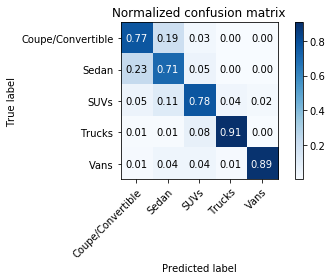

In [17]:
plot_confusion_matrix(y_test, ytest_labels, labels)

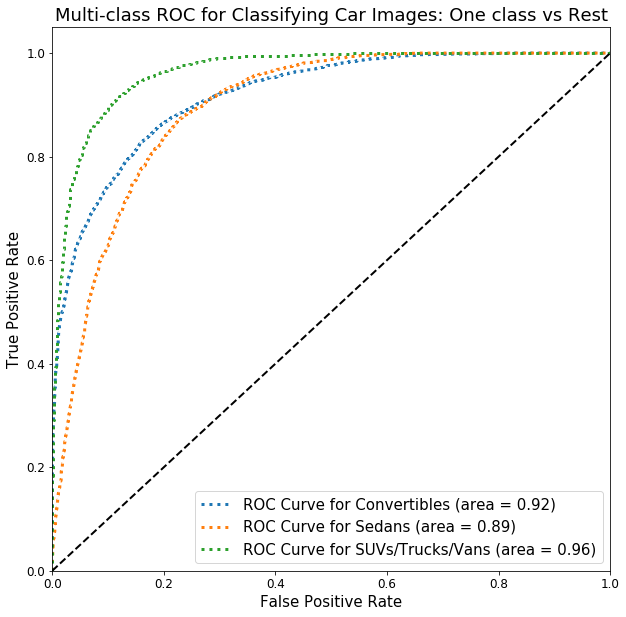

In [18]:
def create_ROC_Curves(y, ypred, classes=[1,2,3,4,5]):
    fpr = dict()
    tpr = dict()
    auc_value = dict()
    y_true_bin = label_binarize(y, classes)
    labels = {
        1: "ROC Curve for Convertibles",
        2: "ROC Curve for Sedans",
        3: "ROC Curve for SUVs",
        4: "ROC Curve for Trucks",
        5: "ROC Curve for Vans/Minivans"
    }
    
    for i in range(len(classes)):
        fpr[i], tpr[i], _ = roc_curve(y_true_bin[:,i], ypred[:,i])
        auc_value[i] = auc(fpr[i], tpr[i])
        plt.plot(fpr[i], tpr[i], label=labels[i+1]+" (area = {:.2f})".format(auc_value[i]),
                 linestyle = ":", lw=3)
    
    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate', fontsize = 15)
    plt.ylabel('True Positive Rate', fontsize = 15)
    plt.legend(loc="lower right", fontsize=15)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.title("Multi-class ROC for Classifying Car Images: One class vs Rest", fontsize = 18)
    plt.show()
    
plt.rcParams['figure.figsize'] = [10, 10]
create_ROC_Curves(y_test, ytest_prob)

In [19]:
print(classification_report(y_test, ytest_labels))

              precision    recall  f1-score   support

           1       0.78      0.77      0.77      2882
           2       0.69      0.71      0.70      2413
           3       0.79      0.78      0.78      1458
           4       0.91      0.91      0.91       771
           5       0.91      0.89      0.90       569

    accuracy                           0.78      8093
   macro avg       0.82      0.81      0.81      8093
weighted avg       0.78      0.78      0.78      8093

